In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [17]:
def simulate(max_time=None):
    global t_map
    initialize()
    n = 0
    time = 0
    while True:
        new_t_map = np.zeros((20,20))
        for i in range(20):
            for j in range(20):
                new_t_map[i, j] = calc_temp(i, j)
        t_map_old = t_map
        t_map = new_t_map
        set_temp()
        n += 1
        time = n*dt
        if max_time != None: # 時間指定がある場合の終了条件
            if time >= max_time:
                break
        else: #  定常状態の終了条件
            if (t_map - t_map_old).max() < threshold:
                break
    plot_t_map(max_time)
    plot_t_map_3d(max_time)
    
def difference_equation(t_i_j, t_ip_j, t_im_j, t_i_jp, t_i_jm):
    dtdx = (t_ip_j - t_im_j)/2/dx
    dtdy = (t_i_jp - t_i_jm)/2/dy
    d2tdx2 = (t_ip_j - 2*t_i_j + t_im_j)/dx**2
    d2tdy2 = (t_i_jp - 2*t_i_j + t_i_jm)/dy**2
    return t_i_j + dt*((d2tdx2 + d2tdy2)/pe - u*dtdx - v*dtdy)

def get_temp(i, j):
    if i < 0 or j < 0:
        return 0
    try:
        return t_map[i, j]
    except IndexError:
        return 0

def calc_temp(i, j):
    t_i_j = get_temp(i, j)
    t_ip_j = get_temp(i + 1, j)
    t_im_j = get_temp(i - 1, j)
    t_i_jp = get_temp(i, j + 1)
    t_i_jm = get_temp(i, j - 1)
    return difference_equation(t_i_j, t_ip_j, t_im_j, t_i_jp, t_i_jm)

def initialize():
    global time, t_map
    time = 0
    t_map = np.zeros((20,20))
    set_temp()

# 中心温度をT=1.0に固定
def set_temp():
    global t_map
    for i in (9, 10):
        for j in (9, 10):
            t_map[i, j] = 1
            
def plot_t_map(time):
    # xy軸が問題と同様の向きになるよう変換して描画
    sns.heatmap(t_map.T[::-1], square=True, vmin=0, vmax=1, xticklabels=False, yticklabels=False, cmap="hot")
    plt.text(0, -1, "0")
    plt.text(-1, 0, "0")
    plt.text(20, -1, "10")
    plt.text(-1, 20, "10")
    plt.text(10, -1, "x")
    plt.text(-1, 10, "y")
    title = "The temperature distribution (t={})".format(time) if time != None else "The steady-state temperature distribution"
    plt.text(5, -2, title)
    plt.show()
    
def plot_t_map_3d(time):
    x = np.linspace(0.25, 9.75, 20)
    y = np.linspace(0.25, 9.75, 20)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure()
    ax = Axes3D(fig)
    surf =  ax.plot_surface(X=X, Y=Y, Z=t_map.T[::-1], cmap='hot')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("T")
    fig.colorbar(surf)
    title = "The temperature distribution (t={})".format(time) if time != None else "The steady-state temperature distribution"
    ax.set_title(title)
    plt.show()

In [52]:

    
# const
threshold = 1e-5
dt = 0.00001
dx = 0.5
dy = 0.5
pe = 1
u = 1
v = 0

# global
t_map = np.zeros((20,20))
set_temp()

In [53]:
def question1_2():
    global pe, u, v
    pe = 1
    u = 1
    v = 0
    simulate(1)
    simulate(5)
    simulate(10)
    
def question1_3():
    global pe, u, v
    u = 1
    v = 0
    for p in [0.1, 1, 100]:
        pe = p
        simulate()

In [54]:
def main():
#     question1_2()
    question1_3()

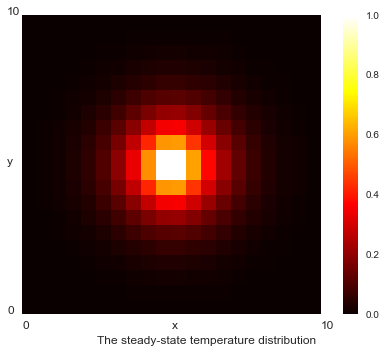

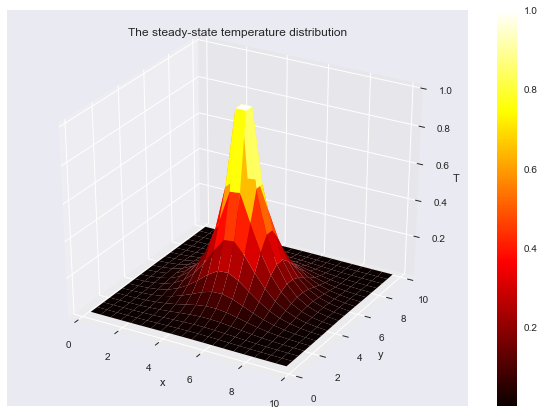

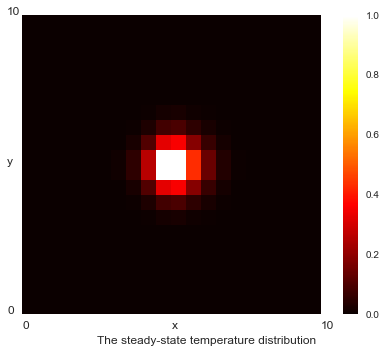

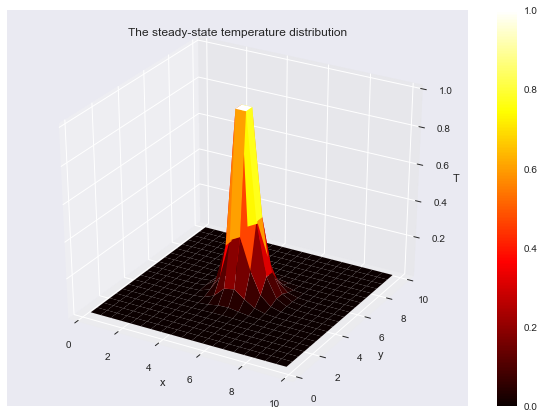

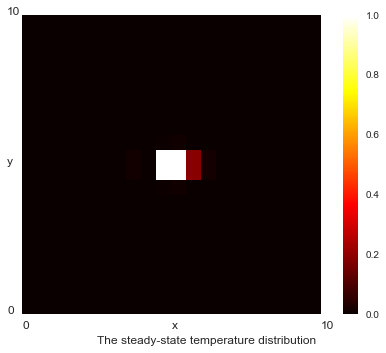

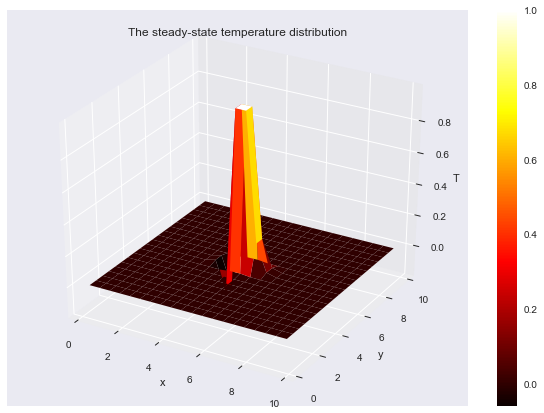

In [55]:
main()